<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/Time_Series_AUTO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df.head(2)

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89

In [4]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [5]:
df.head(2)

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [21]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [11]:
ny_df =df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd17a13c8>,
      dtype=object)

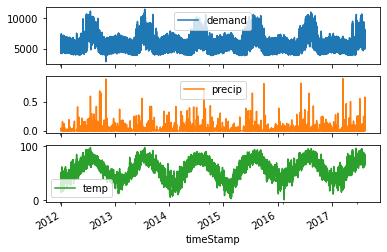

In [12]:
ny_df.plot(subplots = True)

In [14]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [16]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


#Missing Value Treatment


In [22]:
#this method of null checking is quite efficient
#most of the null and nan values are objects so if your column data type is not object then youcan use this
df.query('demand !=demand')

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]

In [23]:
#demand and temp dont chnage rapidly so we can do a forwd fill so that the missing data point will be filled by the previous datapoint
df['demand']= df['demand'].fillna(method = 'ffill')
df['temp'] = df['temp'].fillna(method = 'ffill')
df['precip'] = df['precip'].fillna(method = 'ffill')

In [25]:
df.query('temp != temp')

Empty DataFrame
Columns: [timeStamp, demand, precip, temp]
Index: []

In [31]:
print('Missing Values Check:',df.isnull().any().count())
print('Missing Values Colun:',df.isnull().any())

Missing Values Check: 4
Missing Values Colun: timeStamp    False
demand       False
precip       False
temp         False
dtype: bool


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd1bdf908>,
      dtype=object)

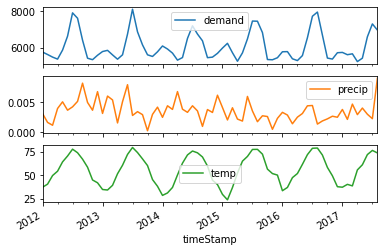

In [33]:
ny_df.resample('M').mean().plot(subplots = True)

In [34]:
ny_df_monthly = ny_df.resample('M').mean()

In [35]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 2.1MB 45.2MB/s 
     |████████████████████████████████| 8.7MB 46.0MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#ARIMA Autoregressive integrated moving average its  a kind of Grid Search

start_p = is the Autoregressieve Part <br>
start_d = is the integrated mart \n <br> 
start_i = is the movng avaerage part <br>

adf stands for [Augmented Dickey-Fuller unit root test](https://machinelearningmastery.com/time-series-data-stationary-python/). It is used to check whther the data is stationary or not.



In [37]:
import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(ny_df_monthly['demand'],
                      m = 12, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,12) [intercept=True]; AIC=1047.384, BIC=1056.262, Time=0.478 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=1101.053, BIC=1105.492, Time=0.011 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=1021.367, BIC=1030.245, Time=0.602 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=1010.603, BIC=1019.481, Time=0.199 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1380.859, BIC=1383.079, Time=0.009 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=1065.502, BIC=1072.160, Time=0.022 seconds
Fit ARIMA(1,0,0)x(2,0,0,12) [intercept=True]; AIC=1020.793, BIC=1031.891, Time=1.377 seconds
Fit ARIMA(1,0,0)x(2,0,1,12) [intercept=True]; AIC=1005.781, BIC=1019.098, Time=1.568 seconds
Near non-invertible roots for order (1, 0, 0)(2, 0, 1

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -489.588
Date:                                 Sun, 05 Jul 2020   AIC                            991.177
Time:                                         13:46:41   BIC                           1004.494
Sample:                                              0   HQIC                           996.453
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3681.4009    766.417      4.803      0.000    2179.252    5183.550
ar.L1          0.8623      0.120      7.188      0.000       0.627       1.097
ar.L2         -0.4707      0.138     -3.423      0.001      -0.740      -0.201
ma.S.L12       0.8894      0.134      6.658      0.000       0.628       1.151
ma.S.L24       0.4435      0.204      2.179      0.029       0.045       0.842
sigma2      8.823e+04   1.48e+04      5.964      0.000    5.92e+04    1.17e+05
===================================================================================
Ljung-Box (Q):                       70.84   Jarque-Bera (JB):                 6.60
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.70   Skew:                             0.55
Prob(H) (two-sided):                  0.41   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0)>='2012-01-31') & (ny_df_monthly.index.get_level_values(0)<='2017-04-30')]
test = ny_df_monthly[(ny_df_monthly.index.get_level_values(0)>'2017-04-30')]

In [44]:
print(train.shape)
print(test.shape)

(64, 3)
(4, 3)


In [48]:
test

demand    precip       temp
timeStamp                                   
2017-05-31  5421.315935  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7309.246677  0.002272  76.395270
2017-08-31  6971.501248  0.008961  73.730258

In [45]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [46]:
forecast = model.predict(n_periods=4,return_conf_int=True)
#return_conf_int is True means it will print the confidance interval too
#in forecasting model we always takes the confidence interval into the account

In [47]:
forecast

(array([5322.1181287 , 6205.6042232 , 7187.96523284, 7302.37699853]),
 array([[4724.96266345, 5919.27359395],
        [5401.98229229, 7009.22615411],
        [6361.51379546, 8014.41667022],
        [6471.18871067, 8133.56528639]]))

In [49]:
forecast_df = pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])

In [50]:
forecast_df

Prediction
timeStamp              
2017-05-31  5322.118129
2017-06-30  6205.604223
2017-07-31  7187.965233
2017-08-31  7302.376999

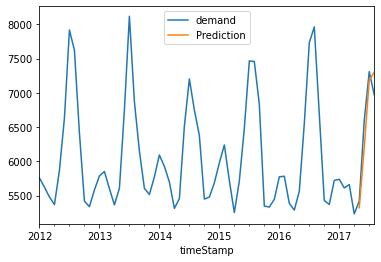

In [51]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()

In [52]:
forecast1 = model.predict(n_periods=8,return_conf_int=True)

In [53]:
forecast1

(array([5322.1181287 , 6205.6042232 , 7187.96523284, 7302.37699853,
        6403.3710953 , 5790.20057687, 5692.7495448 , 5950.52015123]),
 array([[4724.96266345, 5919.27359395],
        [5401.98229229, 7009.22615411],
        [6361.51379546, 8014.41667022],
        [6471.18871067, 8133.56528639],
        [5554.18567053, 7252.55652007],
        [4933.47953863, 6646.92161512],
        [4835.88690208, 6549.61218753],
        [5092.97871732, 6808.06158515]]))

In [54]:
forecast_range = pd.date_range(start='2017-05-31',periods=8,freq='M')

In [61]:
forecast1_df =pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])

In [62]:
forecast1_df

Prediction
2017-05-31  5322.118129
2017-06-30  6205.604223
2017-07-31  7187.965233
2017-08-31  7302.376999
2017-09-30  6403.371095
2017-10-31  5790.200577
2017-11-30  5692.749545
2017-12-31  5950.520151

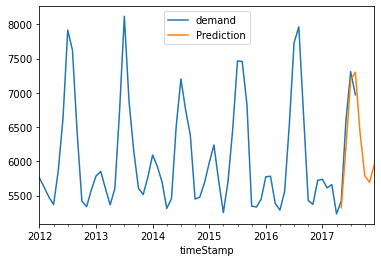

In [63]:
pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()

In [64]:
#Confidene interval
lower = pd.Series(forecast1[1][:,0],index=forecast_range)
upper = pd.Series(forecast1[1][:,1],index=forecast_range)

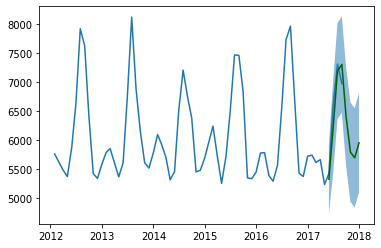

In [71]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df,color='darkgreen')
plt.fill_between(forecast_range,
                  lower,
                  upper,alpha = 1.5)

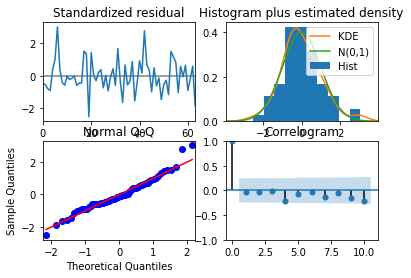

In [72]:
out = model.plot_diagnostics()